# LATAM Data Science Challenge

Libraries installation (if needed)

In [1]:
#!pip install pandas
#!pip isntall matplotlib
#!pip install seaborn
#!pip install scikit-learn

# We takeout the warnings too

import warnings
warnings.filterwarnings("ignore")

#### Libraries definition

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Creating the DataFrame and analyzing the data

In [3]:
csv = 'dataset_SCL.csv'
df = pd.read_csv(csv)

df.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,Domingo,I,American Airlines,Santiago,Miami
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [5]:
for column in df.columns:
    unique_val = df[column].unique()
    unique_val_sorted = sorted(map(str, unique_val))
    print(f"Unique values for colum '{column}': {unique_val_sorted}")

Unique values for colum 'Fecha-I': ['2017-01-01 00:15:00', '2017-01-01 01:15:00', '2017-01-01 01:23:00', '2017-01-01 01:33:00', '2017-01-01 01:42:00', '2017-01-01 02:05:00', '2017-01-01 03:20:00', '2017-01-01 05:15:00', '2017-01-01 05:50:00', '2017-01-01 05:51:00', '2017-01-01 06:05:00', '2017-01-01 06:10:00', '2017-01-01 06:40:00', '2017-01-01 06:45:00', '2017-01-01 07:00:00', '2017-01-01 07:05:00', '2017-01-01 07:14:00', '2017-01-01 07:35:00', '2017-01-01 07:40:00', '2017-01-01 07:45:00', '2017-01-01 07:50:00', '2017-01-01 07:53:00', '2017-01-01 08:00:00', '2017-01-01 08:10:00', '2017-01-01 08:15:00', '2017-01-01 08:20:00', '2017-01-01 08:30:00', '2017-01-01 08:40:00', '2017-01-01 09:00:00', '2017-01-01 09:05:00', '2017-01-01 09:10:00', '2017-01-01 09:15:00', '2017-01-01 09:20:00', '2017-01-01 09:30:00', '2017-01-01 09:35:00', '2017-01-01 09:40:00', '2017-01-01 09:45:00', '2017-01-01 09:50:00', '2017-01-01 10:00:00', '2017-01-01 10:05:00', '2017-01-01 10:10:00', '2017-01-01 10:30:00'

In [6]:
destinies = df['SIGLADES'].value_counts()

# So it will show me all the destinies
pd.set_option('display.max_rows', None)

print(destinies)

Buenos Aires        6335
Antofagasta         5786
Lima                5270
Calama              5146
Puerto Montt        4357
Concepcion          3993
Iquique             3747
Sao Paulo           3569
Temuco              2589
Arica               2436
La Serena           2410
Punta Arenas        2105
Ciudad de Panama    1850
Copiapo             1780
Mendoza             1625
Bogota              1604
Rio de Janeiro      1435
Montevideo          1066
Cordoba             1023
Miami               1016
Madrid               894
Balmaceda            839
Valdivia             753
Ciudad de Mexico     700
Isla de Pascua       452
Guayaquil            422
Nueva York           382
Auckland N.Z.        361
Paris                359
Atlanta              358
Dallas               357
Houston              334
Toronto              283
Roma                 259
Osorno               259
Castro (Chiloe)      235
Asuncion             232
La Paz               209
Londres              205
Sydney               194


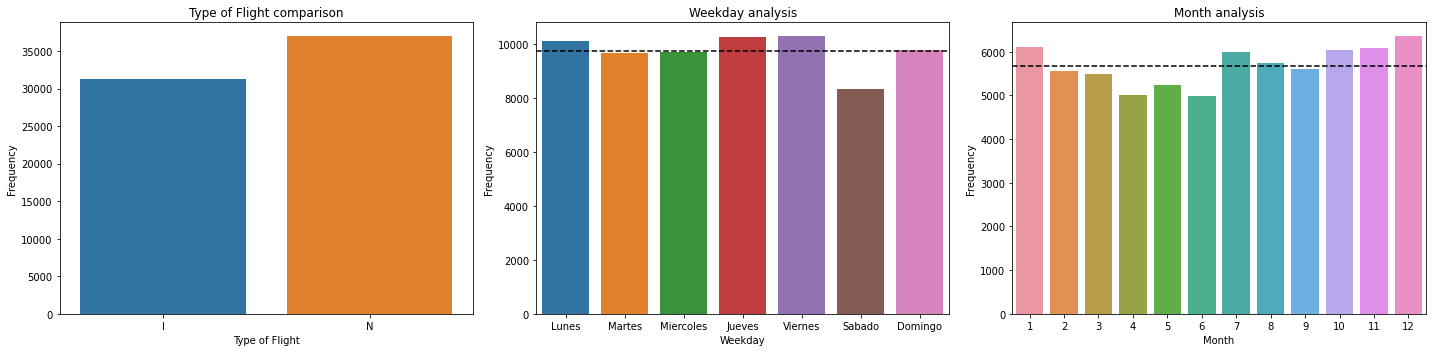

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.countplot(data=df, x='TIPOVUELO', ax=ax[0], order=sorted(df['TIPOVUELO'].unique()))
ax[0].set_xlabel('Type of Flight')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Type of Flight comparison')

week_sorted = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

week_avg = df['DIANOM'].value_counts().mean()

sns.countplot(data=df, x='DIANOM', ax=ax[1],order=week_sorted)
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Weekday analysis')

ax[1].axhline(week_avg, color='Black', linestyle='--')
#ax[1].legend()

mo_avg = df['MES'].value_counts().mean()

sns.countplot(data=df, x='MES', ax=ax[2],order=sorted(df['MES'].unique()))
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Month analysis')

ax[2].axhline(mo_avg, color='Black', linestyle='--')
#ax[2].legend()

# For adjust the space between the subplots
plt.tight_layout()

plt.show()

### 1. How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

- It is a dataset with flights done on 2017.
- The flights consider destinies on American, Oceanic and European cities.
- The most frequent destinies are Chilean cities, but we can't exclude a lot of travels also to cities in closest countries like Argentina, Peru and Brazil.
- The National flights are more common that the International ones, but it differs in less than 5K of travels.
- Saturday is the week day with less flights registered.
- January, July, October, November and December seems to be the months in which people travel consideraly in relation to the annual average.

### 2. Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:

- high_season : 1 if Date-I is between **Dec-15 and Mar-3**, or **Jul-15 and Jul-31**, or **Sep-11 and Sep-30**, 0 otherwise.
- min_diff : difference in minutes between Date-O and Date-I .
- delay_15 : 1 if min_diff > 15, 0 if not.
- period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based onDate-I .

In [8]:
# We create a copy to maintain the integrity of the original dataframe in case is required
df2 = df.copy()

df2['Fecha-I'] = pd.to_datetime(df2['Fecha-I'], format='%Y-%m-%d')


def high_season(dt):
    rang1 = (dt >= pd.to_datetime('2017-12-15')) & (dt <= pd.to_datetime('2018-03-03'))
    rang2 = (dt >= pd.to_datetime('2017-07-15')) & (dt <= pd.to_datetime('2017-07-31'))
    rang3 = (dt >= pd.to_datetime('2017-09-11')) & (dt <= pd.to_datetime('2017-09-30'))
    return 1 if (rang1 or rang2 or rang3) else 0

# We apply the function for High Seasons
df2['high_season'] = df2['Fecha-I'].apply(high_season)

#min_diff

df2['Fecha-I'] = pd.to_datetime(df2['Fecha-I'])
df2['Fecha-O'] = pd.to_datetime(df2['Fecha-O'])

df2['min_diff'] = (df2['Fecha-O'] - df2['Fecha-I']).dt.total_seconds() / 60

def delay_15(time):
    return 1 if (time > 15) else 0

df2['delay_15'] = df2['min_diff'].apply(delay_15)
    
def period(time):
    hour = time.hour
    if 5 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 18:
        return 'afternoon'
    else:
        return 'night'
    
df2['period_day'] = df2['Fecha-I'].apply(period)

df2.to_csv('synthetic_features.csv', sep=';', index=False)

print('Please check the synthetic_features.csv file')

Please check the synthetic_features.csv file


### 3. What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?

For answering these questions, let's create a new DataFrame with the commented columns and analyze the correlation matrix for Delay Rate across the other columns mentioned. 

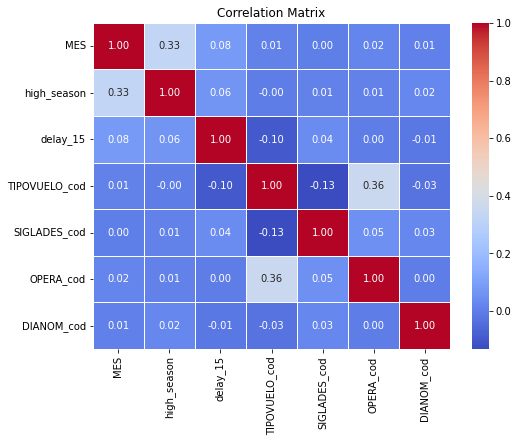

In [9]:
commented_columns = ['SIGLADES', 'OPERA', 'MES', 'DIANOM', 'high_season', 'TIPOVUELO', 'delay_15']
df3 = df2[commented_columns]

le = LabelEncoder()
df3['TIPOVUELO_cod'] = le.fit_transform(df['TIPOVUELO'])
df3['SIGLADES_cod'] = le.fit_transform(df['SIGLADES'])
df3['OPERA_cod'] = le.fit_transform(df['OPERA'])

# For codificate the weekdays we use the variable "week_sorted" we previously used

weekday_cod = {day: ind for ind, day in enumerate(week_sorted)}
df3['DIANOM_cod'] = df3['DIANOM'].map(weekday_cod)


df3.drop(columns=['TIPOVUELO', 'SIGLADES', 'OPERA', 'DIANOM'], inplace=True)

df3_corr_matrix = df3.corr()

# Let's go for the correlation matrix as we propose
plt.figure(figsize=(8, 6))
sns.heatmap(df3_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

None of those columns have a huge influence of generate a 15-min delay since each value is very close to 0, just the Flight Type has a very little influence with the Delay_Rate, but is not significant.

I was expecting that the Week day, month or high_season columns were significant to this rate, or even the airline company (we could be able to identify some operational deficiency on their services).

## 4. Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay. Feel free to generate additional variables and/or supplement with external variables.


Looking on Google for the best ML algorithm to predict and analyze Airflight delay rates, it said that RandomForest is one of the most effective or used one, so I'm going to use it too for this question.

In [10]:
from sklearn.preprocessing import OneHotEncoder

# First of all let's codify our variables
labenc = LabelEncoder()
onehot = OneHotEncoder()

#le_cols = ['OPERA', 'SIGLAORI', 'SIGLADES']
le_cols = ['OPERA', 'SIGLADES']
onehot_cols = ['DIANOM', 'TIPOVUELO', 'period_day']

df4 = pd.DataFrame()

# Let's add the columns that will be Label Encoded
for col in le_cols:
    df4[col] = labenc.fit_transform(df2[col])

    
# Now let's add the labels that will be OneHot Encoded
oh_encoded_cols = pd.DataFrame(onehot.fit_transform(df2[onehot_cols]).toarray(),
                            columns=onehot.get_feature_names(onehot_cols))
df4= pd.concat([df4, oh_encoded_cols], axis=1)

# Let's add other columns for applying RandoForest
df4['Fecha-I'] = df2['Fecha-I'].astype('int64') // 10**9
df4['Vlo-I'] = pd.to_numeric(df2['Vlo-I'], errors='coerce').fillna(0).astype('int64')
df4['Fecha-O'] = df2['Fecha-O'].astype('int64') // 10**9
df4['Vlo-O'] = pd.to_numeric(df2['Vlo-O'], errors='coerce').fillna(0).astype('int64')
df4['high_season'] = df2['high_season']
df4['min_diff'] = df2['min_diff']
df4['delay_15'] = df2['delay_15']

print(df4.dtypes)


OPERA                     int32
SIGLADES                  int32
DIANOM_Domingo          float64
DIANOM_Jueves           float64
DIANOM_Lunes            float64
DIANOM_Martes           float64
DIANOM_Miercoles        float64
DIANOM_Sabado           float64
DIANOM_Viernes          float64
TIPOVUELO_I             float64
TIPOVUELO_N             float64
period_day_afternoon    float64
period_day_morning      float64
period_day_night        float64
Fecha-I                   int64
Vlo-I                     int64
Fecha-O                   int64
Vlo-O                     int64
high_season               int64
min_diff                float64
delay_15                  int64
dtype: object


We are going to consider the Delay Rate as follows:

$$ 
\text{Delay Rate} = \frac{\text{Total Delayed Flights}}{\text{Total Flights}}
 $$
 
We will sum all the delay_15 values to calculate the Total Delayed Flights for whole dataset and the delay_15 predictions (Train and Test values). Also, the number of flights for the Training outputs will correspond to the 70% of the total (68,206) which is approximately 47.744, while for the Test outputs would be 20,462.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df4.drop('delay_15', axis=1)
y = df4.delay_15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)

#Lets calculate the Delay Rates
delay_rate = df4['delay_15'].sum()/68206
delay_rate_train = sum(y_train_pred)/47744
delay_rate_test = sum(y_test_pred)/20462

print('The Original Delay Rate is: ', round(delay_rate,5))
print('The Delay Rate for the Training variables is: ', round(delay_rate_train,5))
print('The Delay Rate for the Test variables is: ', round(delay_rate_test,5))



The Original Delay Rate is:  0.18494
The Delay Rate for the Training variables is:  0.18407
The Delay Rate for the Test variables is:  0.18698


## 5. Evaluate model performance in the predictive task across each model that you trained. Define and justify what metrics you used to assess model performance. Pick the best trained model and evaluate the following: What variables were the most influential in the prediction task? How could you improve the Performance?

As we can see above, the Delay Rates are very similar, but we can calculate the percentage difference of each as a measure of imprecision:

In [12]:
perc_diff_train = round(((delay_rate_train - delay_rate)/delay_rate)*100, 4)
perc_diff_test = round(((delay_rate_test - delay_rate)/delay_rate)*100, 4)

print('The imprecision for the Training Delay Rate is: ',perc_diff_train, '%')
print('The imprecision for the Test Delay Rate is: ',perc_diff_test, '%')

The imprecision for the Training Delay Rate is:  -0.473 %
The imprecision for the Test Delay Rate is:  1.1036 %


We could conclude that RandomForest predicted very accurately this model since the imprecision percentages results are very low.

Unfortunately it was not possible for me to calculate more known performance metrics as accuracy/precision, recall, f1_score or others because in this model we were predicting a binary column (Delay_15).

Now, let's see which columns are more relevant for the prediction in this new model:

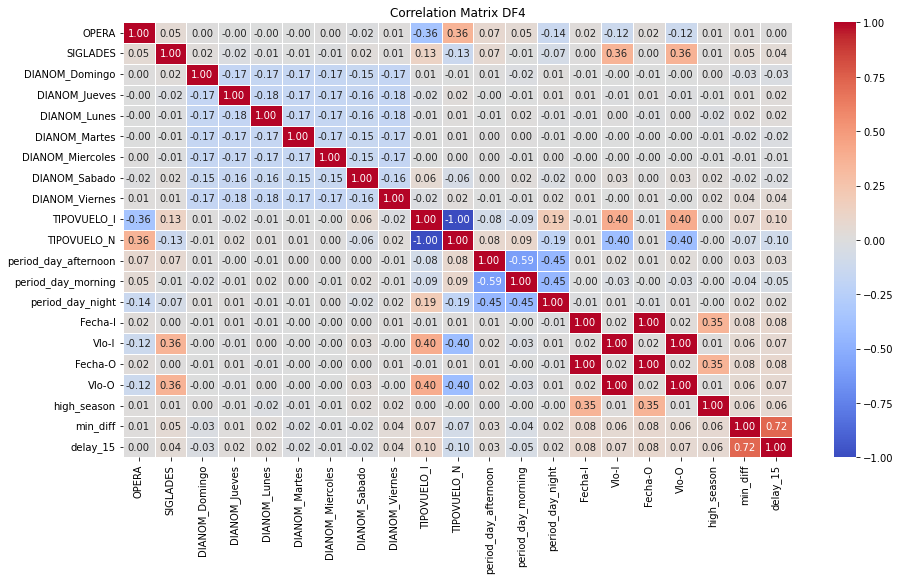

In [13]:
df4_corr_matrix = df4.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(df4_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix DF4')
plt.show()

For the target column "delay_15" we can see that most of the columns are not significantly relevant (very close to 0), except for "min_diff" that has an important correlation with the target value.

For improving the model we could take out some columns that has their correlation value very close to 0 since they are not relevant for the model (for example, "OPERA"). We could also add more relevant parameters (intuitively speaking) like for example:

- Weather parameters: one that tells us if it is a clear day, cloudy, rainy, snowy, etc. This ones could be related on the conditions for flying or the airstrip status.
- The last date the aircraft was serviced: since many of the delays happen because have some issues sometimes. The longest the time range of the last maintenance, the more aircraft issues happen, which will cause some delay.